<font size="6">Pre-Processing and Training Data Development</font>

In this notebook, cleaned data from previous notebook will be used to prepare for modelling in the future notebook. The target varibale will be set. Also numerical and non-numerical columns will be seperated to go through a different preprocess.Different types of columns will be treated in a different way and classifier will be developed for further use as well. \
\
Using the pipeline, a baseline models using three different machine learning algorithms will be developed. Also hyperparameter tuning will be conducted for those baseline models using pipeline as well. Lastly, confusion matrix, ROC-AUC curve will be plotted for compare the model performance in the future modelling. 

Lastly, both dataset with and without 'City' and 'States' columns will go through pipeline to evaluate if one produces a better machine learning algorithm. Finally, train and test dataset those go through preprocessor pipeline will be saved for future use.

<font size="5"> Import and load

Tools and data was loaded.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [5]:
df=pd.read_csv('../Capstone-3-/file/loan_data.csv',index_col='Unnamed: 0')

In [6]:
df.head()

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,City,State,Job_Yrs,House_Yrs,Risk_Flag
0,1,1303834,23,3,SINGLE,RENTED,NO,MECHANICAL_ENGINEER,REWA,MADHYA_PRADESH,3,13,0
1,2,7574516,40,10,SINGLE,RENTED,NO,SOFTWARE_DEVELOPER,PARBHANI,MAHARASHTRA,9,13,0
2,3,3991815,66,4,MARRIED,RENTED,NO,TECHNICAL_WRITER,ALAPPUZHA,KERALA,4,10,0
3,4,6256451,41,2,SINGLE,RENTED,YES,SOFTWARE_DEVELOPER,BHUBANESWAR,ODISHA,2,12,1
4,5,5768871,47,11,SINGLE,RENTED,NO,CIVIL_SERVANT,TIRUCHIRAPPALLI,TAMIL_NADU,3,14,1


In [7]:
df=df.set_index('Id')

In [8]:
df

,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,City,State,Job_Yrs,House_Yrs,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,SINGLE,RENTED,NO,MECHANICAL_ENGINEER,REWA,MADHYA_PRADESH,3,13,0
2,7574516,40,10,SINGLE,RENTED,NO,SOFTWARE_DEVELOPER,PARBHANI,MAHARASHTRA,9,13,0
3,3991815,66,4,MARRIED,RENTED,NO,TECHNICAL_WRITER,ALAPPUZHA,KERALA,4,10,0
4,6256451,41,2,SINGLE,RENTED,YES,SOFTWARE_DEVELOPER,BHUBANESWAR,ODISHA,2,12,1
5,5768871,47,11,SINGLE,RENTED,NO,CIVIL_SERVANT,TIRUCHIRAPPALLI,TAMIL_NADU,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,SINGLE,RENTED,NO,SURGEON,KOLKATA,WEST_BENGAL,6,11,0
251997,2843572,26,10,SINGLE,RENTED,NO,ARMY_OFFICER,REWA,MADHYA_PRADESH,6,11,0
251998,4522448,46,7,SINGLE,RENTED,NO,DESIGN_ENGINEER,KALYAN-DOMBIVLI,MAHARASHTRA,7,12,0


Data types of the columns are identified. Also the proportion of the risk flag of the samples are calculated. 

In [9]:
a=df['Risk_Flag'].value_counts(normalize=True)
percent_risk=round(a,4)
percent_risk*100

0    87.7
1    12.3
Name: Risk_Flag, dtype: float64

In [10]:
df.dtypes

Income              int64
Age                 int64
Experience          int64
Marital_Status     object
House_Ownership    object
Car_Ownership      object
Profession         object
City               object
State              object
Job_Yrs             int64
House_Yrs           int64
Risk_Flag           int64
dtype: object

In [11]:
df.columns

Index(['Income', 'Age', 'Experience', 'Marital_Status', 'House_Ownership',
       'Car_Ownership', 'Profession', 'City', 'State', 'Job_Yrs', 'House_Yrs',
       'Risk_Flag'],
      dtype='object')

Columns without data type 'object', and 'Risk_Flag' are omitted form numerical columns and columns with datatype 'object' are stored in categorical column list. 

In [12]:
df_num = df.loc[:,(df.dtypes != 'object')&(df.columns != 'Risk_Flag')]
df_cat=df.loc[:,(df.dtypes == 'object')]

In [13]:
df_num_cols=df_num.columns
df_cat_cols=df_cat.columns

In [14]:
df_num_cols

Index(['Income', 'Age', 'Experience', 'Job_Yrs', 'House_Yrs'], dtype='object')

In [15]:
df_cat_cols

Index(['Marital_Status', 'House_Ownership', 'Car_Ownership', 'Profession',
       'City', 'State'],
      dtype='object')

Data was seperated by a traget variable, 'Risk_Flag' in this project. 

In [16]:
df_x = df.loc[:, df.columns != 'Risk_Flag']
df_y=df.loc[:,df.columns == 'Risk_Flag']

In [17]:
df_x_cols=df_x.columns

<font size="5"> Preprocessing

A dataset with 'City' and 'State' Columns are splitted in to train and test set.

In [18]:
X_train_all,X_test_all,y_train_all,y_test_all=train_test_split(df_x,df_y,test_size=0.3,random_state=42,stratify=df_y)

In [19]:
std_scale=StandardScaler()

The numerical columns are scaled using standard scaler and categorical columns have been encoded.

In [20]:
X_train_all[df_num_cols]=std_scale.fit_transform(X_train_all[df_num_cols])
X_test_all[df_num_cols]=std_scale.transform(X_test_all[df_num_cols])


In [21]:
X_train_all=pd.get_dummies(X_train_all)
X_test_all=pd.get_dummies(X_test_all)

In [22]:
import re
X_train_all = X_train_all.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

<font size="5"> Baseline Modelling with 'City','State' Columns

Train and test samples are splitted.\
First, dataset that contains 'City' and 'State' columns will be used to create a baseline model. 

Pipelines with different classifiers are created. In this notebook, baseline models are created with using logistic regression, random forest classifier and LGBM classifier.

In [23]:
pipeline_lr = Pipeline(steps=[('classifier', LogisticRegression())])
pipeline_rf = Pipeline(steps=[('classifier', RandomForestClassifier())])
pipeline_lgbm =Pipeline(steps=[('classifier', LGBMClassifier())])

In [24]:
pipelines = [pipeline_lr, pipeline_rf, pipeline_lgbm]
pipe_dict = {0: 'Logistic Regression', 1: 'RandomForest', 2: 'LGBM'}

For loop was used to fit all the pipelines in training sets.

In [25]:
for pipe in pipelines:
    pipe.fit(X_train_all, y_train_all)

Model performances were evaluated using model's accuracy score and ROC _AUC score.

In [26]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test_all,y_test_all)))

Logistic Regression Test Accuracy: 0.8769973544973545
RandomForest Test Accuracy: 0.8993783068783069
LGBM Test Accuracy: 0.878095238095238


In [27]:
lr=pipeline_lr.predict(X_test_all)
rf=pipeline_rf.predict(X_test_all)
lgbm=pipeline_lgbm.predict(X_test_all)

In [28]:
results=[lr,rf,lgbm]

In [29]:
for i,result in enumerate(results):
    print("{} ROC_AUC: {}".format(pipe_dict[i],roc_auc_score(y_test_all,result)))

Logistic Regression ROC_AUC: 0.5
RandomForest ROC_AUC: 0.7465804948746954
LGBM ROC_AUC: 0.5083922134068934


Another loop that develops confusion matrix for all the baseline models is developed.\
The models inclduing Logistic Regression and LGBM classifier looked like they perform well according to their accuracy score, however, once Classification Report below are plotted, the score for 'class 1' was very poor.

In [75]:
for i,result in enumerate(results):
    print("{} Classification Report: \n{}".format(pipe_dict[i],classification_report(y_test_all,result)))

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

RandomForest Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66301
           1       0.60      0.54      0.57      9299

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600

LGBM Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.66      0.02      0.04      9299

    accuracy                           0.88     75600
   macro avg      

Confusion Matrix and ROC-AUC are plotted for each classifier are visualized for further evaluation.

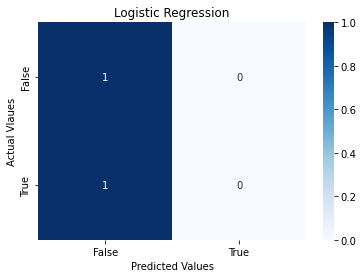

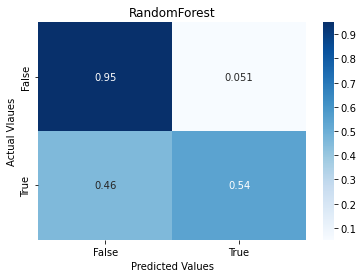

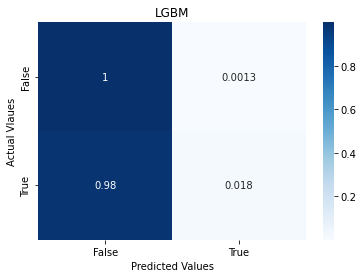

In [31]:
for i,result in enumerate(results):    
    cmn = confusion_matrix(y_test_all,result).astype('float') / confusion_matrix(y_test_all,result).sum(axis=1)[:, np.newaxis]
    _=sns.heatmap(cmn,annot=True,cmap='Blues')
    _.set_title(pipe_dict[i])
    _.set_xlabel('Predicted Values')
    _.set_ylabel('Actual Vlaues')
    _.xaxis.set_ticklabels(['False','True'])
    _.yaxis.set_ticklabels(['False','True'])
    plt.show()

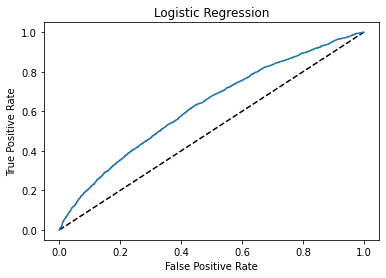

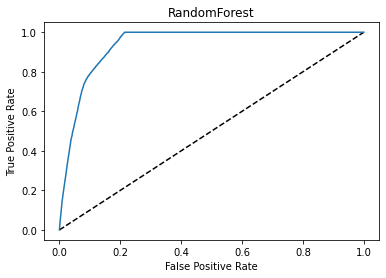

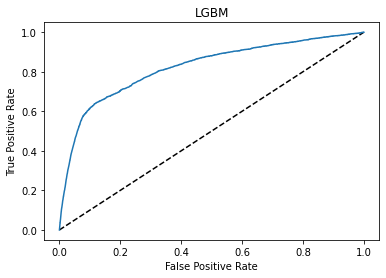

In [32]:
for i,result in enumerate(pipelines):
    y_scores=result.predict_proba(X_test_all)[:,1]
    f_lr,t_lr,_=roc_curve(y_test_all,y_scores)
    roc_auc=auc(f_lr,t_lr)
    round(roc_auc,2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(f_lr, t_lr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(pipe_dict[i])
    plt.show()

<font size="4">Modelling without City and State

From the dataset, columns, 'City' and 'State' will be dropped to compare the performance of the models.

In [33]:
df1=df.copy()

In [34]:
df1.columns

Index(['Income', 'Age', 'Experience', 'Marital_Status', 'House_Ownership',
       'Car_Ownership', 'Profession', 'City', 'State', 'Job_Yrs', 'House_Yrs',
       'Risk_Flag'],
      dtype='object')

In [35]:
df_ncs=df1.drop(columns=['City','State'])

In [36]:
df_ncs

,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,Job_Yrs,House_Yrs,Risk_Flag
Id,,,,,,,,,,
1,1303834,23,3,SINGLE,RENTED,NO,MECHANICAL_ENGINEER,3,13,0
2,7574516,40,10,SINGLE,RENTED,NO,SOFTWARE_DEVELOPER,9,13,0
3,3991815,66,4,MARRIED,RENTED,NO,TECHNICAL_WRITER,4,10,0
4,6256451,41,2,SINGLE,RENTED,YES,SOFTWARE_DEVELOPER,2,12,1
5,5768871,47,11,SINGLE,RENTED,NO,CIVIL_SERVANT,3,14,1
...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,SINGLE,RENTED,NO,SURGEON,6,11,0
251997,2843572,26,10,SINGLE,RENTED,NO,ARMY_OFFICER,6,11,0
251998,4522448,46,7,SINGLE,RENTED,NO,DESIGN_ENGINEER,7,12,0


In [38]:
df_num_ncs = df_ncs.loc[:,(df_ncs.dtypes != 'object')&(df_ncs.columns != 'Risk_Flag')]
df_cat_ncs=df_ncs.loc[:,(df_ncs.dtypes == 'object')]

In [39]:
df_num_cols_ncs=df_num_ncs.columns
df_cat_cols_ncs=df_cat_ncs.columns

In [40]:
df_x_ncs = df_ncs.loc[:, df_ncs.columns != 'Risk_Flag']
df_y_ncs=df_ncs.loc[:,df_ncs.columns == 'Risk_Flag']

In [41]:
df_x_cols_ncs=df_x_ncs.columns

Dataset that does not contain columns, 'City' and 'State' was splitted in to train and test set.

In [42]:
X_train_ncs,X_test_ncs,y_train_ncs,y_test_ncs=train_test_split(df_x_ncs,df_y_ncs,test_size=0.3,random_state=42,stratify=df_y_ncs)

In [43]:
std_scale=StandardScaler()
X_train_ncs[df_num_cols_ncs]=std_scale.fit_transform(X_train_ncs[df_num_cols_ncs])
X_test_ncs[df_num_cols_ncs]=std_scale.transform(X_test_ncs[df_num_cols_ncs])
X_train_ncs=pd.get_dummies(X_train_ncs)
X_test_ncs=pd.get_dummies(X_test_ncs)
import re
X_train_ncs = X_train_ncs.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

Same preprocessor and pipeline was used as above however, just different dataset was used.

In [45]:
pipeline_lr_ncs = Pipeline(steps=[('classifier', LogisticRegression())])

pipeline_rf_ncs = Pipeline(steps=[('classifier', RandomForestClassifier())])
pipeline_lgbm_ncs =Pipeline(steps=[('classifier', LGBMClassifier())])

In [46]:
pipelines_ncs = [pipeline_lr_ncs, pipeline_rf_ncs, pipeline_lgbm_ncs]
pipe_dict_ncs = {0: 'Logistic Regression', 1: 'RandomForest', 2: 'LGBM'}

In [47]:
for pipe in pipelines_ncs:
    pipe.fit(X_train_ncs, y_train_ncs)

In [48]:
for i,model in enumerate(pipelines_ncs):
    print("{} Test Accuracy: {}".format(pipe_dict_ncs[i],model.score(X_test_ncs,y_test_ncs)))

Logistic Regression Test Accuracy: 0.8769973544973545
RandomForest Test Accuracy: 0.8987566137566138
LGBM Test Accuracy: 0.8786640211640212


In [49]:
lr_ncs_=pipeline_lr_ncs.predict(X_test_ncs)
rf_ncs_=pipeline_rf_ncs.predict(X_test_ncs)
lgbm_ncs_=pipeline_lgbm_ncs.predict(X_test_ncs)

In [50]:
results_ncs=[lr_ncs_,rf_ncs_,lgbm_ncs_]

Classification report of the models those created with dataset that does not contain, 'City' and 'State' column were printed. 

In [52]:
for i,result in enumerate(results_ncs):
    print("{} Confusion Matrix: \n{}".format(pipe_dict_ncs[i],classification_report(y_test_ncs,result)))

Logistic Regression Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

RandomForest Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66301
           1       0.60      0.54      0.57      9299

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600

LGBM Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66301
           1       0.79      0.02      0.04      9299

    accuracy                           0.88     75600
   macro avg       0.84      0.51

As the classification report shows above, when the dataset without 'City' and 'State was used, it performs slightly better and it will be used for hyperparameter tuning and further model development.

<font size="5"> Hyperparameter Tuning

Hyperparameter tuning for baseline models are conducted and evaluated.

In [53]:
from sklearn.model_selection import GridSearchCV

Parameters for different machien learning algorithms are developed and the hyperparameters are fit to training datasets to determine the best parameters and accuracy score.

In [54]:
grid_param_lr= [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 }]
gridsearch_lr = GridSearchCV(pipeline_lr_ncs, grid_param_lr, cv=2, verbose=0,n_jobs=-1) # Fit grid search
best_model_lr = gridsearch_lr.fit(X_train_ncs,y_train_ncs)

In [56]:
print('best_estimator',best_model_lr.best_params_)
print("The mean accuracy of the model is:",best_model_lr.score(X_test_ncs,y_test_ncs))

best_estimator {'classifier': LogisticRegression(), 'classifier__C': 1.0, 'classifier__penalty': 'l2'}
The mean accuracy of the model is: 0.8769973544973545


In [57]:
grid_param_rf= [
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100],
                 "classifier__criterion":['gini','entropy'],
                 }]
gridsearch_rf = GridSearchCV(pipeline_rf_ncs, grid_param_rf, cv=2, verbose=0,n_jobs=-1) # Fit grid search
best_model_rf = gridsearch_rf.fit(X_train_ncs,y_train_ncs)

In [58]:
print('best_estimator',best_model_rf.best_params_)
print("The mean accuracy of the model is:",best_model_rf.score(X_test_ncs,y_test_ncs))

best_estimator {'classifier': RandomForestClassifier(criterion='entropy'), 'classifier__criterion': 'entropy', 'classifier__n_estimators': 100}
The mean accuracy of the model is: 0.8992857142857142


In [59]:
grid_param_lgbm= [
                {"classifier": [LGBMClassifier()],
                 "classifier__n_estimators": [10, 100],
                 "classifier__criterion":['gini','entropy'],
                 }]
gridsearch_lgbm = GridSearchCV(pipeline_lgbm_ncs, grid_param_lgbm, cv=2, verbose=0,n_jobs=-1) # Fit grid search
best_model_lgbm = gridsearch_lgbm.fit(X_train_ncs,y_train_ncs)

[LightGBM] [Warning] Unknown parameter: criterion


In [60]:
print('best_estimator',best_model_lgbm.best_params_)
print("The mean accuracy of the model is:",best_model_lgbm.score(X_test_ncs,y_test_ncs))

best_estimator {'classifier': LGBMClassifier(criterion='gini'), 'classifier__criterion': 'gini', 'classifier__n_estimators': 100}
The mean accuracy of the model is: 0.8786640211640212


The tuned models are used to predict the test data and confusion matrixs are developed for each models. Confusion matrix charts are also developed for visualization.

In [61]:
lr_tuned=best_model_lr.predict(X_test_ncs)
rf_tuned=best_model_rf.predict(X_test_ncs)
lgbm_tuned=best_model_lgbm.predict(X_test_ncs)

In [62]:
best_result=[best_model_lr,best_model_rf,best_model_lgbm]

In [63]:
results_tuned=[lr_tuned,rf_tuned,lgbm_tuned]

In [64]:
for i,result in enumerate(results_tuned):
    print("{} Confusion Matrix: \n{}".format(pipe_dict_ncs[i],classification_report(y_test_ncs,result)))

Logistic Regression Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

RandomForest Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66301
           1       0.60      0.54      0.57      9299

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600

LGBM Confusion Matrix: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66301
           1       0.79      0.02      0.04      9299

    accuracy                           0.88     75600
   macro avg       0.84      0.51

In [65]:
for i,result in enumerate(results_tuned):
    print("{} Confusion Matrix: \n{}".format(pipe_dict_ncs[i],confusion_matrix(y_test_ncs,result)))

Logistic Regression Confusion Matrix: 
[[66301     0]
 [ 9299     0]]
RandomForest Confusion Matrix: 
[[62930  3371]
 [ 4243  5056]]
LGBM Confusion Matrix: 
[[66256    45]
 [ 9128   171]]


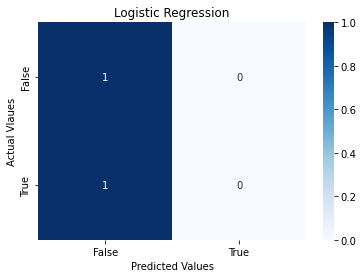

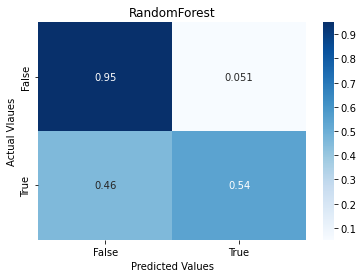

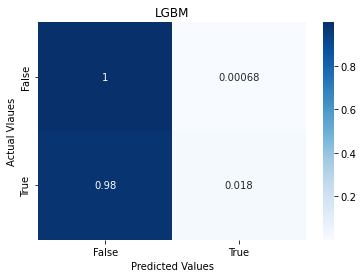

In [66]:
for i,result in enumerate(results_tuned):    
    cmn = confusion_matrix(y_test_ncs,result).astype('float') / confusion_matrix(y_test_ncs,result).sum(axis=1)[:, np.newaxis]
    _=sns.heatmap(cmn,annot=True,cmap='Blues')
    _.set_title(pipe_dict_ncs[i])
    _.set_xlabel('Predicted Values')
    _.set_ylabel('Actual Vlaues')
    _.xaxis.set_ticklabels(['False','True'])
    _.yaxis.set_ticklabels(['False','True'])
    plt.show()

Lastly, ROC-AUC graphs are plotted for different baseline models.

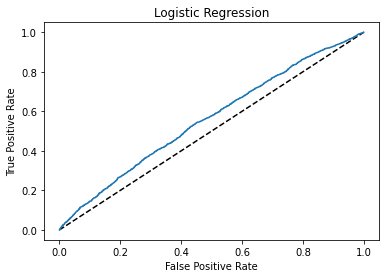

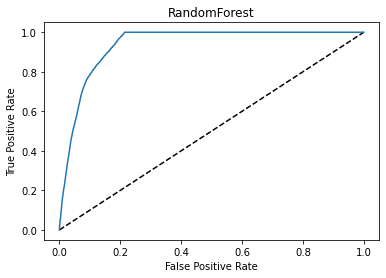

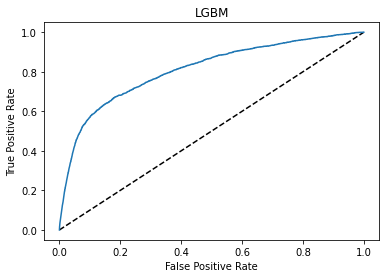

In [67]:
for i,result in enumerate(best_result):
    y_scores=result.predict_proba(X_test_ncs)[:,1]
    f_lr,t_lr,_=roc_curve(y_test_ncs,y_scores)
    roc_auc=auc(f_lr,t_lr)
    round(roc_auc,2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(f_lr, t_lr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(pipe_dict_ncs[i])
    plt.show()

<font size="5">Data Preparation

Lastly, dataset without columns 'City' and 'State' will go through preprocessor that was created above and saved for model development in the future. By exporting, train and test set using preprocessor, 'preprocessor' does not have to be included in the pipeline to save time.

In [68]:
import pickle

In [70]:
output = open('X_train.pkl', 'wb')
pickle.dump(X_train_ncs, output)
output.close()

In [71]:
output = open('X_test.pkl', 'wb')
pickle.dump(X_test_ncs, output)
output.close()

In [72]:
output = open('y_train.pkl', 'wb')
pickle.dump(y_train_ncs, output)
output.close()

In [73]:
output = open('y_test.pkl', 'wb')
pickle.dump(y_test_ncs, output)
output.close()

In [74]:
df_ncs.to_csv('data.csv')

<font size="5"> Conclusion

In this notebook, the first dataset that contains columns, 'City' and 'State' and the second datset without columns 'City' and 'State' were used to create baseline models using, Logistic Regression, Random Forest and Light GBM machine learning algorithms, to evaluate the performance of models when each datasets are used. In case, dataset without 'City' and 'State' performs better the columns can be dropped and by dropping them it will reduce 'noise' created.

In conclusion, the baseline models without 'City' and 'State' columns performed better and they were dropped for hyperparameter tuning. The three models with different algorithms performed in terms of the accuracy score(all above 85 percenet). However, once we look at the classification report of each models, Logistic Regression and LightGBM Models' precision, recall, and f-1 score on predicting 'Risk' value are very poor. It is due to imbalanced classification since there are only about 12 percent of population with risk on getting loans. Therefore in the future notebook, different resampling techinques must be used to deal with the imbalanced classification.\
Lastly, in the next notebook, train and test set splitted from dataset without 'City' and 'State' Columns and 'preprocessed' set exported from the current notebook will be used for further model development. 